In [48]:
import numpy as np

In [49]:
import pickle
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(b_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train_t.pickle', 'rb') as handle:
    bt_t = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'rb') as handle:
    ut_t = pickle.load(handle)

In [50]:
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(b_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test_t.pickle', 'rb') as handle:
    bt_test_t = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'rb') as handle:
    ut_test_t = pickle.load(handle)

In [51]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train.pickle', 'rb') as handle:
    bt = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train.pickle', 'rb') as handle:
    ut = pickle.load(handle)
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test.pickle', 'rb') as handle:
    bt_test = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test.pickle', 'rb') as handle:
    ut_test = pickle.load(handle)

In [52]:
import networkx as nx

In [53]:
G=nx.Graph()

In [54]:
G.add_nodes_from(list(bt.keys()))

In [55]:
G.add_nodes_from(list(ut.keys()))

In [56]:
b=list(bt.keys())
for i in range(0,len(bt.keys())):
    bu=bt[b[i]]
    for f in bu:
        G.add_edge(f,b[i])

In [57]:
b=list(bt.keys())
for i in range(0,len(bt.keys())):
    bu=bt_t[b[i]]
    for f in bu:
        G.add_edge(f,b[i])

In [58]:
G.number_of_nodes()

359007

In [59]:
G.number_of_edges()

871648

In [60]:
pr = nx.pagerank(G, alpha=0.8,max_iter=200)

In [61]:
b=list(bt.keys())
user_test=set(list(ut_test.keys()))
ut2=set(list(ut_test_t.keys()))
user_test=user_test.union(ut2)
recommendation_b2={}

In [62]:
b_dict=bt
for i in range(0,len(b_dict.keys())):
    #print(i)
    for j in range(i+1,len(b_dict.keys())):
        
        intersection=b_dict[b[i]].intersection(b_dict[b[j]])
        
        if len(intersection)>1000:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=150#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=150#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=150#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=150#len(intersection)
        elif len(intersection)>500:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=50#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=50#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=50#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=50#len(intersection)
        elif len(intersection)>100:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=15#len(intersection)
            else:
                
                recommendation_b2[b[j]]={}
                for m in diff1:
                    
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=15#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=15#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=15#len(intersection)
        elif len(intersection)>50:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1#len(intersection)

In [63]:
ll=[]

for i in recommendation_b2:
    for j in recommendation_b2[i]:
        ll.append([i,j])

In [18]:
import pandas as pd
ll2=pd.DataFrame(ll,columns=['business_id','user_id'])

In [19]:
#ll2.to_csv("/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/subset_cross.csv")

In [20]:
bussiness=set(recommendation_b2.keys()).intersection(set(bt_test.keys()))
bussiness2=set(recommendation_b2.keys()).intersection(set(bt_test_t.keys()))
#bussiness=bussiness.union(bussiness2)
bussiness=bussiness.intersection(bussiness2)
len(bussiness)

696

In [21]:
cross_pagerank_precision_2=[]
pagerank_precision_2=[]
cross_pagerank_recall_2=[]
pagerank_recall_2=[]

In [22]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2.append(n1/(n1+n))

In [23]:
def b1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_precision_2.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
           # print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_recall_2.append(n1/(n1+n))

In [24]:
for i in range(4,-1,-1):
    a1(i)
    b1(i)

In [25]:
# With decision tree results
cross_pagerank_precision_2_1=[]
pagerank_precision_2_1=[]
cross_pagerank_recall_2_1=[]
pagerank_recall_2_1=[]

In [26]:
import pickle
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/reg_d.pickle', 'rb') as handle:
    bt = pickle.load(handle)

In [27]:
bt2={}
for b in bt:
    bt2[b]={}
    f={}
    for i in bt[b]:
        f[i[0]]=i[1]
    bt2[b]=f

In [28]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        
        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_1.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_1.append(n1/(n1+n))

In [29]:
def b1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_precision_2_1.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
           # print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_recall_2_1.append(n1/(n1+n))

In [30]:
for i in range(4,-1,-1):
    print(i)
    a1(i)
    b1(i)

4
3
2
1
0


In [31]:
# Only Decision Tree Results
cross_pagerank_precision_2_11=[]
pagerank_precision_2_11=[]
cross_pagerank_recall_2_11=[]
pagerank_recall_2_11=[]

In [32]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        
        l=sorted(l,key=lambda x: -bt2[b][x[0]])
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_11.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -bt2[b][x[0]])
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_11.append(n1/(n1+n))

In [33]:
for i in range(4,-1,-1):
    print(i)
    a1(i)


4
3
2
1
0


In [163]:
# With only ALS
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/ratingDictionary1.pickle', 'rb') as handle:
    btt = pickle.load(handle)

In [164]:
cross_pagerank_precision_2_117=[]
pagerank_precision_2_117=[]
cross_pagerank_recall_2_117=[]
pagerank_recall_2_117=[]

In [166]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        
        l=sorted(l,key=lambda x:  -btt[b][x[0]] if x[0] in btt[b] else 0)
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_117.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x:  -btt[b][x[0]] if x[0] in btt[b] else 0)
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_117.append(n1/(n1+n))

In [167]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [34]:
# With ALS
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/ratingDictionary1.pickle', 'rb') as handle:
    btt = pickle.load(handle)

In [35]:
cross_pagerank_precision_2_112=[]
pagerank_precision_2_112=[]
cross_pagerank_recall_2_112=[]
pagerank_recall_2_112=[]

In [36]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        
        l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_112.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x:-(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_112.append(n1/(n1+n))

In [37]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [38]:
# With Sentiment
cross_pagerank_precision_2_113=[]
pagerank_precision_2_113=[]
cross_pagerank_recall_2_113=[]
pagerank_recall_2_113=[]

In [39]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/sentiment.pickle', 'rb') as handle:
    btts = pickle.load(handle)

In [40]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        
        l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]]-(btts[b][x[0]]*1000 if btts[b][x[0]]==1 else -btts[b][x[0]]*100) if x[0] in btt else -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_113.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x:-(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]]-(btts[b][x[0]]*1000 if btts[b][x[0]]==1 else -btts[b][x[0]]*100) if x[0] in btt else -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_113.append(n1/(n1+n))

In [41]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [208]:
# virali combined  2
cross_pagerank_precision_2_118=[]
pagerank_precision_2_118=[]
cross_pagerank_recall_2_118=[]
pagerank_recall_2_118=[]

In [209]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/yelp_result_result2_pickle.pickle', 'rb') as handle:
    yrpp = pickle.load(handle)

In [210]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        #l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        
        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0   )
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_118.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x:-yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0    )
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_118.append(n1/(n1+n))

In [211]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [235]:
# virali combined all
cross_pagerank_precision_2_119=[]
pagerank_precision_2_119=[]
cross_pagerank_recall_2_119=[]
pagerank_recall_2_119=[]

In [236]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/yelp_result_result2_pickle.pickle', 'rb') as handle:
    yrpp = pickle.load(handle)

In [237]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        #l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        
        l=sorted(l,key=lambda x:(-bt2[b][x[0]]/2) -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0   )
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_119.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x:(bt2[b][x[0]]/2) -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0    )
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_119.append(n1/(n1+n))

In [238]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [241]:
#baseline
cross_pagerank_precision_2_120=[]
pagerank_precision_2_120=[]
cross_pagerank_recall_2_120=[]
pagerank_recall_2_120=[]

In [242]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/yelp_result_pickle.pickle', 'rb') as handle:
    yrpp = pickle.load(handle)

In [246]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        #l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        
        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0   )
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_120.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0    )
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_120.append(n1/(n1+n))

In [247]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [283]:
#2_2
cross_pagerank_precision_2_122=[]
pagerank_precision_2_122=[]
cross_pagerank_recall_2_122=[]
pagerank_recall_2_122=[]

In [284]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/yelp_result_clustering2_2_2.pickle', 'rb') as handle:
    yrpp = pickle.load(handle)

In [285]:


def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        #l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        
        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0   )
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_122.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0    )
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_122.append(n1/(n1+n))



In [286]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


In [335]:
#2_3
cross_pagerank_precision_2_123=[]
pagerank_precision_2_123=[]
cross_pagerank_recall_2_123=[]
pagerank_recall_2_123=[]

In [336]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/yelp_result_clustering3.pickle', 'rb') as handle:
    yrpp = pickle.load(handle)

In [337]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())
        #l=sorted(l,key=lambda x:  -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]]-btt[b][x[0]] if x[0] in btt[b] else -(x[1])-(pr[x[0]]*100000)-bt2[b][x[0]])
        
        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0   )
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2_123.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -yrpp[b][x[0]] if b in yrpp and x[0] in yrpp[b] else 0    )
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2_123.append(n1/(n1+n))




In [338]:
for i in range(4,-1,-1):
    print(i)
    a1(i)

4
3
2
1
0


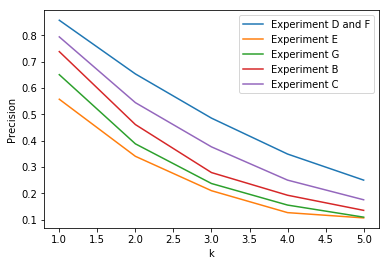

In [341]:
#individual
import matplotlib.pyplot as plt
a,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2[::-1],label="Experiment D and F")
#b,=plt.plot(cross_pagerank_precision_2_120[::-1],label="Baseline")
e,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_11[::-1],label="Experiment E")

g,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_117[::-1],label="Experiment G")
i,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_118[::-1],label="Experiment B")
j,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_122[::-1],label="Experiment C")
plt.legend(handles=[a,e,g,i,j])
plt.ylabel("Precision")
plt.xlabel("k")

plt.show()

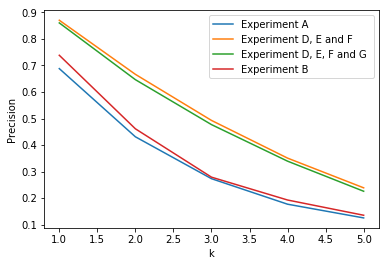

In [342]:
import matplotlib.pyplot as plt

b,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_120[::-1],label="Experiment A")

#a,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2[::-1],label="Experiment D and F")
d,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_1[::-1],label="Experiment D, E and F")
c,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_112[::-1],label="Experiment D, E, F and G ")
#d,=plt.plot(cross_pagerank_precision_2_119[::-1],label="Experiment 3 (Cross-Recommendation PageRank DecisioTree ALS KNN)")

#e,=plt.plot(cross_pagerank_precision_2_11[::-1],label="Experiment 5 (Decision Tree)")

#g,=plt.plot(cross_pagerank_precision_2_117[::-1],label="ALS")
#i,=plt.plot(cross_pagerank_precision_2_118[::-1],label="Virali 2")

#g,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_117[::-1],label="Experiment G")
i,=plt.plot([1,2,3,4,5],cross_pagerank_precision_2_118[::-1],label="Experiment B")



plt.legend(handles=[b,d,c,i])
plt.ylabel("Precision")
plt.xlabel("k")
plt.show()

In [344]:
print("At least Actual Users, Experiment A, Experiment D and F, Experiment 3 ")
for i in range(0,5):
    print(4-i+1,",",cross_pagerank_precision_2_112[i],cross_pagerank_precision_2_118[i],",",cross_pagerank_precision_2_112[i],",",cross_pagerank_precision_2_118[i])

At least Actual Users, Experiment A, Experiment D and F, Experiment 3 
5 , 0.22557471264367815 0.13505747126436782 , 0.22557471264367815 , 0.13505747126436782
4 , 0.3390804597701149 0.1925287356321839 , 0.3390804597701149 , 0.1925287356321839
3 , 0.47701149425287354 0.27873563218390807 , 0.47701149425287354 , 0.27873563218390807
2 , 0.646551724137931 0.46120689655172414 , 0.646551724137931 , 0.46120689655172414
1 , 0.860632183908046 0.7385057471264368 , 0.860632183908046 , 0.7385057471264368


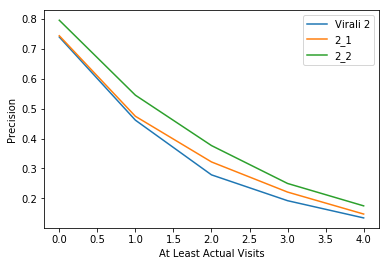

In [288]:
import matplotlib.pyplot as plt
#a,=plt.plot(cross_pagerank_precision_2[::-1],label="Experiment 1 (Cross-Recommendation PageRank)")
#b,=plt.plot(cross_pagerank_precision_2_1[::-1],label="Experiment 2 (Cross-Recommendation PageRank DecisioTree)")
#c,=plt.plot(cross_pagerank_precision_2_112[::-1],label="Experiment 3 (Cross-Recommendation PageRank DecisioTree ALS)")
#d,=plt.plot(cross_pagerank_precision_2_119[::-1],label="Experiment 3 (Cross-Recommendation PageRank DecisioTree ALS KNN)")

#e,=plt.plot(cross_pagerank_precision_2_11[::-1],label="Experiment 5 (Decision Tree)")

#g,=plt.plot(cross_pagerank_precision_2_117[::-1],label="ALS")
i,=plt.plot(cross_pagerank_precision_2_118[::-1],label="Virali 2")
j,=plt.plot(cross_pagerank_precision_2_121[::-1],label="2_1")
k,=plt.plot(cross_pagerank_precision_2_122[::-1],label="2_2")
plt.legend(handles=[i,j,k])
plt.ylabel("Precision")
plt.xlabel("At Least Actual Visits")
plt.show()